In [62]:
import numpy
from scipy.stats import rv_continuous
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Triangle_rv(rv_continuous):
    def _pdf(self, x):
        if x <=0.0 or x >= 1.0:
            return 0.0
        elif x <= 0.5:
            return 4.0*x
        else: # 0.5 < x < 1.0
            return 4 - 4.0*x

In [4]:
triangle = Triangle_rv(a=0.0,b=1.0)

In [5]:
triangle.cdf(1)

1.0

In [6]:
triangle.pdf(0.5)

2.0

In [7]:
# Check if scipy will catch an invalid pdf description
class Unbounded_rv(rv_continuous):
    def _pdf(self,x):
        if x <= 0.5:
            return 4.0*x
        else:
            return 4 - 4.0*x

In [8]:
bad_triangle = Unbounded_rv()

In [9]:
bad_triangle.cdf(1)

/home/patrick/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


-1.679743221855993e+20

In [10]:
#  This is unfortunate.  It appears that scipy does not check
# the validity of continous random variable object pdfs

In [11]:
bad_triangle.pdf(1)

0.0

In [12]:
bad_triangle.pdf(3)

-8.0

In [13]:
# Horrible!!  It doesn't even catch negative values!

In [63]:
# Try creating a variable triangle 
class Concentrated_rv(rv_continuous):
    
    def __init__(self, a, b, m=0.5, seed=12345):
        assert(a < m < b)
        super().__init__(a=a, b=b)
        self.m = m # midpoint (or other point between a and b)
        
        self.width = self.b - self.a
        self.height = 2.0 / self.width
        random.seed(seed)
        
    def _pdf(self,x):
        if x <= self.a:
            return 0.0
        elif x >= self.b:
            return 0.0
        elif x <= self.m:
            return (self.height / (self.m - self.a)) * (x - self.a)
        else: # x > self.m
            return self.height - (self.height / (self.b - self.m)) * (x - self.m)
    
    # vectorized pdf and cdf functions; these will compute the pdf, cdf
    # function values for each x value in an array
    #vpdf = numpy.vectorize(self.pdf)
    #numpy.vectorize(self.cdf)
    
    def plotpdf(self):
        x = numpy.linspace(0.0, 1.0, 100)
        #y = self.pdf(x)
        #y = numpy.apply_along_axis(self.pdf, 0, x)
        vpdf = numpy.vectorize(self.pdf)
        y = vpdf(x)
        plt.plot(x,y)
    
    def plotcdf(self):
        x = numpy.linspace(0.0, 1.0, 100)
        #y = numpy.apply_along_axis(self.cdf, 0, x)
        #y = self.vcdf(x)
        vcdf = numpy.vectorize(self.cdf)
        y = vcdf(x)
        plt.plot(x,y)
    
    def sample(self):
        return self.cdf(random.uniform(0,1))

In [64]:
RV = Concentrated_rv(0.0,0.2,0.1)

In [65]:
print(RV._pdf(0.5))
print(RV.pdf(0.5))
RV.cdf(0.5)

0.0
0.0


1.0

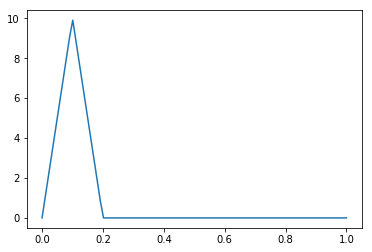

In [66]:
RV.plotpdf()

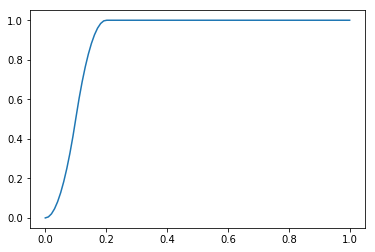

In [67]:
RV.plotcdf()